In [0]:
#@title Default title text
def how_many_classes(n_class):
  for i in n_class:
    class[i]= 

In [0]:
API_KEY = 'e53717d6f82f4ce0af1d7c6c4e7222fe';

In [0]:
!pip install clarifai

In [0]:
from clarifai.rest import ClarifaiApp
from clarifai.rest import Image as ClImage
from google.colab import files
from IPython.display import Image, display

In [0]:
def upload_files():
  from google.colab import files
  uploaded = files.upload()
  for k, v in uploaded.items():
    open(k, 'wb').write(v)
  return list(uploaded.keys())

In [25]:
app = ClarifaiApp(api_key=API_KEY)

model = app.models.get('general-v1.3')
imageUploaded = upload_files()

Saving 15207766_fc2f1d692c_n.jpg to 15207766_fc2f1d692c_n.jpg


In [0]:
def getClassesFoundInJson(json_file):
  for key in json_file['outputs'][0]['data']['concepts']:
      print(key['name'],round(key['value'],4))

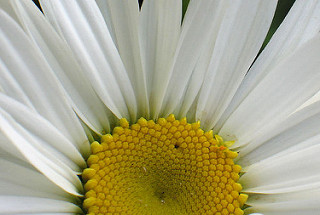

{'status': {'code': 10000, 'description': 'Ok'}, 'outputs': [{'id': 'd26a2f719cb2484bbbeaca262aa425e7', 'status': {'code': 10000, 'description': 'Ok'}, 'created_at': '2018-05-16T09:01:23.281654591Z', 'model': {'id': 'aaa03c23b3724a16a56b629203edc62c', 'name': 'general-v1.3', 'created_at': '2016-03-09T17:11:39.608845Z', 'app_id': 'main', 'output_info': {'message': 'Show output_info with: GET /models/{model_id}/output_info', 'type': 'concept', 'type_ext': 'concept'}, 'model_version': {'id': 'aa9ca48295b37401f8af92ad1af0d91d', 'created_at': '2016-07-13T01:19:12.147644Z', 'status': {'code': 21100, 'description': 'Model trained successfully'}}, 'display_name': 'General'}, 'input': {'id': 'b4f9ee546e624c7698d4ddd0c294100d', 'data': {'image': {'url': 'https://s3.amazonaws.com/clarifai-api/img2/prod/small/ab70408ad0754d928114728a3bb8183c/ecced60d4bcf471a98ed878dd80b2c3a', 'base64': 'dHJ1ZQ=='}}}, 'data': {'concepts': [{'id': 'ai_tBcWlsCp', 'name': 'nature', 'value': 0.991887, 'app_id': 'main'}

In [81]:
#test if uploading image works
import os
script_dir = os.path.dirname("__file__") 

display(Image(imageUploaded[0]))


#then try to predict possible values from this image
model = app.models.get('general-v1.3')
imageTest = ClImage(filename=imageUploaded[0])
jsonFromClarifai = model.predict([imageTest])

#print the complext json returned by CLARIFAI general model API
print(jsonFromClarifai)


getClassesFoundInJson(jsonFromClarifai)


In [0]:
#ask how many classes and for each one of them save the label/name
def how_many_classes(n_class):
  classes = []
  for i in range(0,n_class):
    print(i)
    classes.append(input('Enter class name n-'+str(i+1)+': '))
  return classes

In [0]:
def trainWithClasses():
  classes = how_many_classes(5)
  
  for specClass in classes:
    print("Upload some photo for "+specClass)
    filesUpl = upload_files()
    
    for fileUpl in filesUpl:
      print("Photo"+fileUpl)
      imageNow = ClImage(filename=fileUpl, concepts=[specClass])
      app.inputs.bulk_create_images([imageNow])
    

In [0]:
trainWithClasses()

In [0]:
#create a model in the clarifai application selected by the API key
model = app.models.create(model_id="flowers", concepts=["daisy","dandelion","rose","sunflower","tulip"])

In [70]:
#start training the model
model.train()

In [82]:
model = app.models.get('flowers')

jsonFromClarifai = model.predict([imageTest])

getClassesFoundInJson(jsonFromClarifai)

daisy 1.0
tulip 0.0
sunflower 0.0
dandelion 0.0
rose 0.0
